In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1828 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Maize_Army_Wormy_Damage', 'Maize_Healthy', 'Maize_Other_Damage']

In [5]:
len(dataset)

58

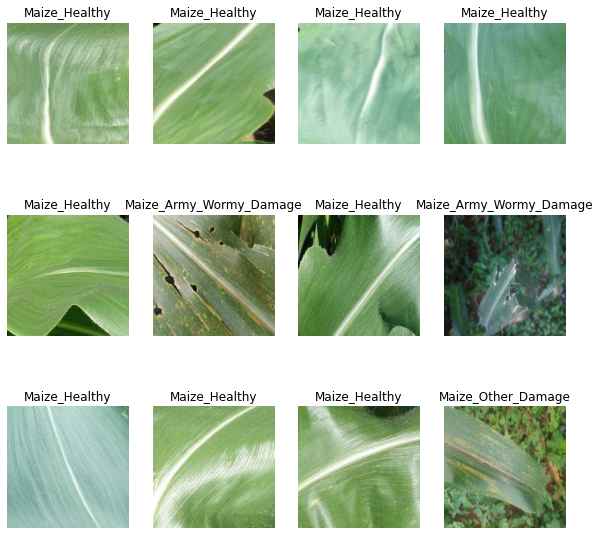

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
train_size = 0.8
len(dataset)*train_size

46.400000000000006

In [8]:
train_ds = dataset.take(46)
len(train_ds)

46

In [9]:
test_ds = dataset.skip(46)
len(test_ds)

12

In [10]:
val_size=0.1
len(dataset)*val_size

5.800000000000001

In [11]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [12]:
test_ds = test_ds.skip(6)
len(test_ds)

6

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

46
5
7


In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
46/46 [==============================] - 235s 3s/step - loss: 0.8257 - accuracy: 0.6870 - val_loss: 0.8753 - val_accuracy: 0.6870
Epoch 2/50
46/46 [==============================] - 132s 3s/step - loss: 0.6238 - accuracy: 0.7590 - val_loss: 0.6651 - val_accuracy: 0.7535
Epoch 3/50
46/46 [==============================] - 204s 4s/step - loss: 0.5137 - accuracy: 0.7881 - val_loss: 0.4372 - val_accuracy: 0.8075
Epoch 4/50
46/46 [==============================] - 140s 3s/step - loss: 0.3997 - accuracy: 0.8193 - val_loss: 0.3903 - val_accuracy: 0.8158
Epoch 5/50
46/46 [==============================] - 139s 3s/step - loss: 0.3595 - accuracy: 0.8449 - val_loss: 0.3315 - val_accuracy: 0.8636
Epoch 6/50
46/46 [==============================] - 134s 3s/step - loss: 0.3156 - accuracy: 0.8747 - val_loss: 0.3659 - val_accuracy: 0.8560
Epoch 7/50
46/46 [==============================] - 135s 3s/step - loss: 0.2888 - accuracy: 0.8878 - val_loss: 0.3026 - val_accuracy: 0.8747
Epoch 8/50
46

In [23]:
scores = model.evaluate(test_ds)

46/46 [==============================] - 26s 566ms/step - loss: 0.1051 - accuracy: 0.9598


In [24]:
scores

[0.10507959872484207, 0.9598338007926941]

In [25]:
history

In [26]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 46}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
len(history.history['accuracy'])

50

In [28]:
history.history['accuracy']

[0.6869806051254272,
 0.7590027451515198,
 0.7880886197090149,
 0.819252073764801,
 0.8448753356933594,
 0.8746537566184998,
 0.8878116607666016,
 0.8912742137908936,
 0.8878116607666016,
 0.9065096974372864,
 0.886426568031311,
 0.9065096974372864,
 0.8975069522857666,
 0.9016620516777039,
 0.9106647968292236,
 0.9162049889564514,
 0.9120498895645142,
 0.9037396311759949,
 0.9058171510696411,
 0.8857340812683105,
 0.9162049889564514,
 0.9210526347160339,
 0.8940443396568298,
 0.9044321179389954,
 0.9321329593658447,
 0.9265928268432617,
 0.9321329593658447,
 0.93282550573349,
 0.9321329593658447,
 0.9314404726028442,
 0.9300553798675537,
 0.9245152473449707,
 0.9355955719947815,
 0.93282550573349,
 0.9342105388641357,
 0.9369806051254272,
 0.9376731514930725,
 0.945983350276947,
 0.9397506713867188,
 0.9362881183624268,
 0.9362881183624268,
 0.9335179924964905,
 0.948060929775238,
 0.942520797252655,
 0.9494459629058838,
 0.9515235424041748,
 0.940443217754364,
 0.9293628931045532,
 0

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

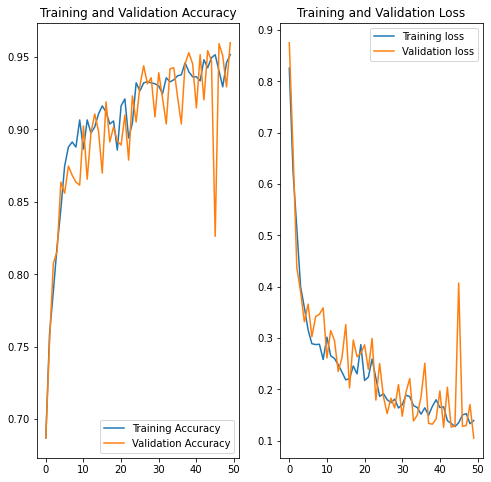

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label ='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Maize_Army_Wormy_Damage
[0.8873095  0.07561632 0.0370742 ]
0
predicted label: Maize_Army_Wormy_Damage


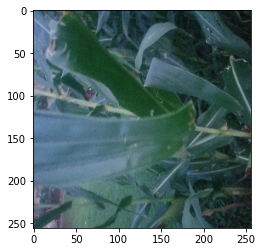

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

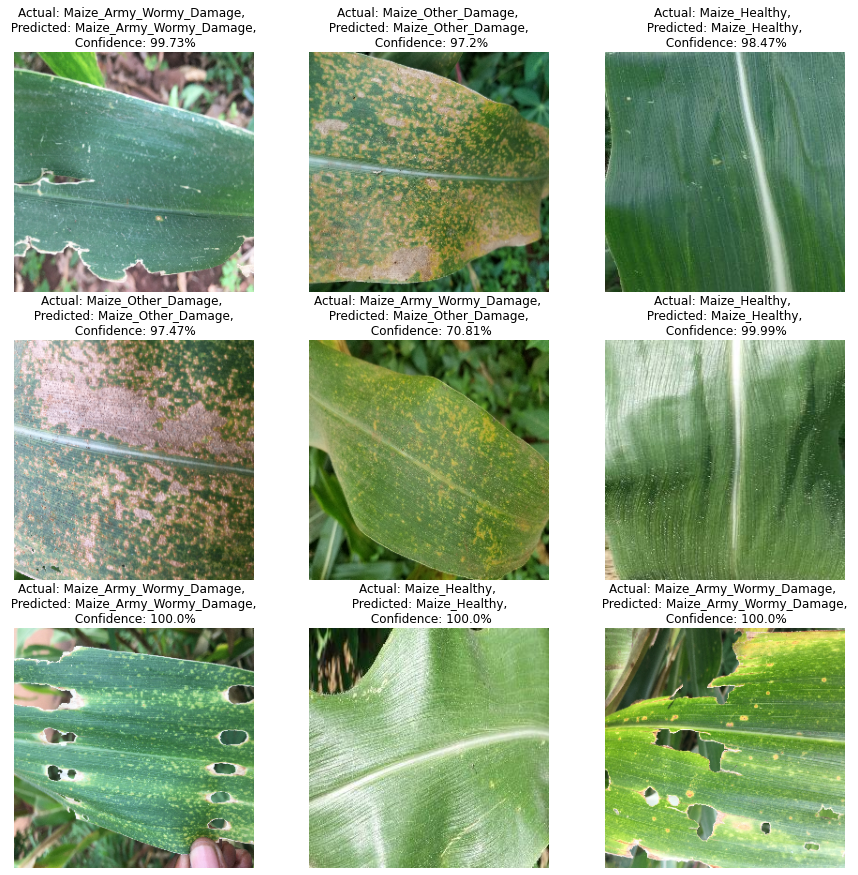

In [34]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        
        plt.axis("off")

In [35]:
model_version=1


In [36]:
model.save(f"../saved_models/1.h5")